In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn.preprocessing
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('donnees-hospitalieres-covid19-2020-03-26-13h32.csv',';')
df.index = df['jour']
df = df.drop(['jour'],axis=1)
NEWTIME = []
NBCAS = []
TIME = list(set(df.index))
for time in TIME:
    NEWTIME.append(time)
    NBCAS.append(df[df.index==time].iloc[:,1].sum())
df = pd.DataFrame(index=NEWTIME)
df['Cas'] = NBCAS
df.head()

,Cas
2020-03-19,303
2020-03-24,306
2020-03-25,303
2020-03-20,303
2020-03-22,303


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2020-03-19 to 2020-03-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cas     8 non-null      int64
dtypes: int64(1)
memory usage: 128.0+ bytes


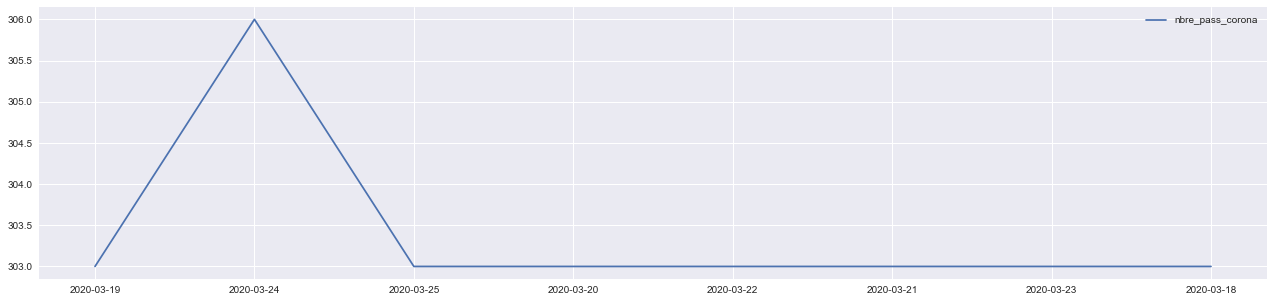

In [4]:
plt.figure(figsize=(22,5))
plt.plot(df,label='nbre_pass_corona')
plt.legend()

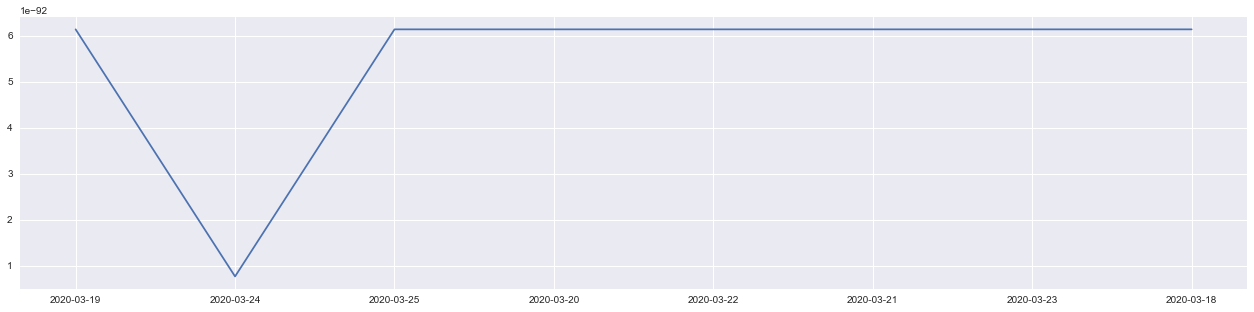

In [5]:
plt.figure(figsize=(22,5))
plt.plot(1/np.exp2(df),label='nbre_pass_corona')

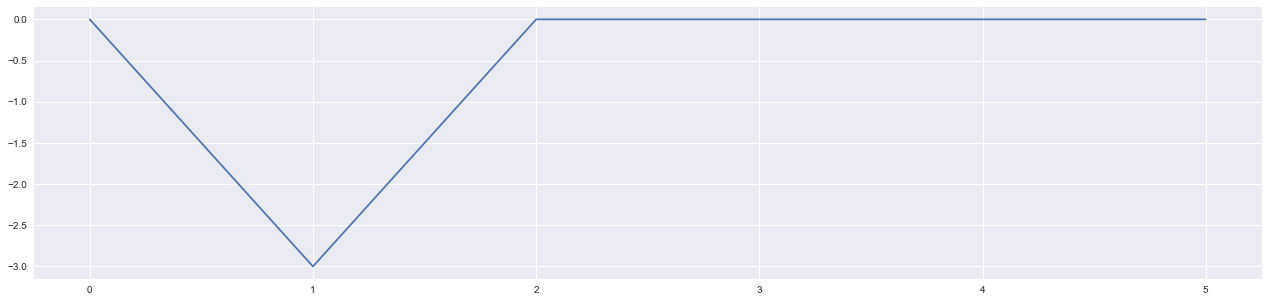

Coefficients: [[-3.69318182e-02]
 [ 5.54924242e-01]
 [-2.62215909e+00]
 [ 3.76650433e+00]
 [ 3.03284091e+02]]


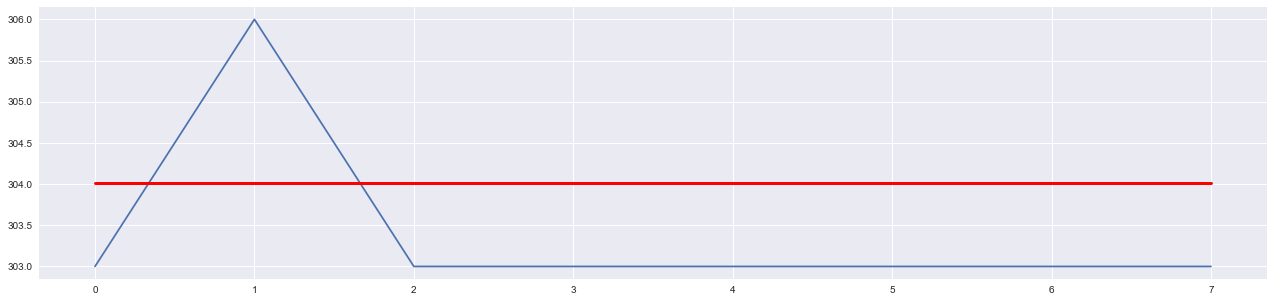

In [6]:
X = df.values
diff = list()
days_in_year = 2
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
plt.figure(figsize=(22,5))
plt.plot(diff)
plt.show()


# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(df))]
y = df.values
degree = 4
coef = np.polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
plt.figure(figsize=(22,5))
plt.plot(df.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()


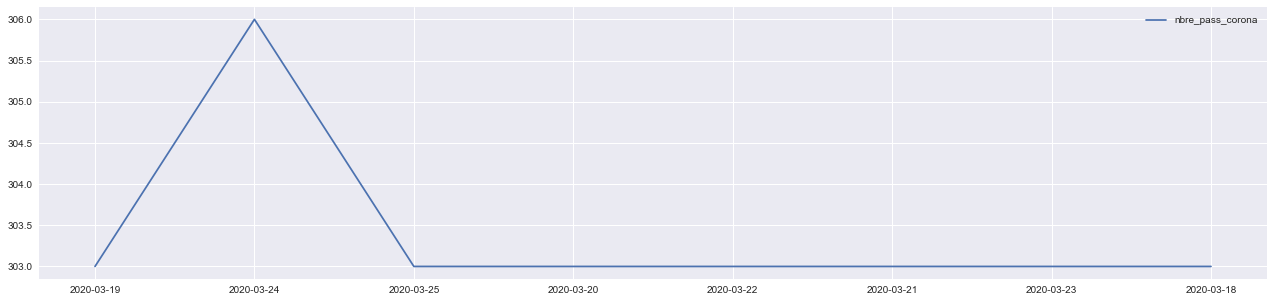

In [7]:
plt.figure(figsize=(22,5))
plt.plot(df,label='nbre_pass_corona')
plt.legend()

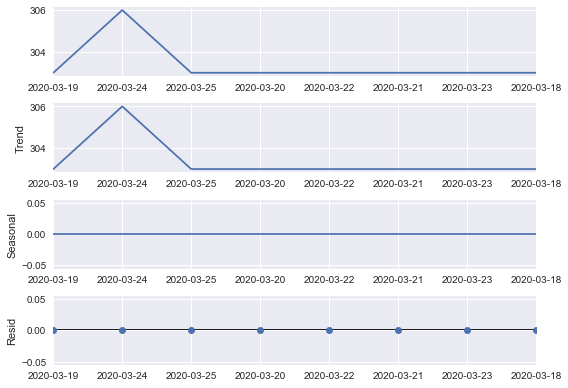

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df
result = seasonal_decompose(series, model='additive',freq=1)
result.plot()
plt.show()

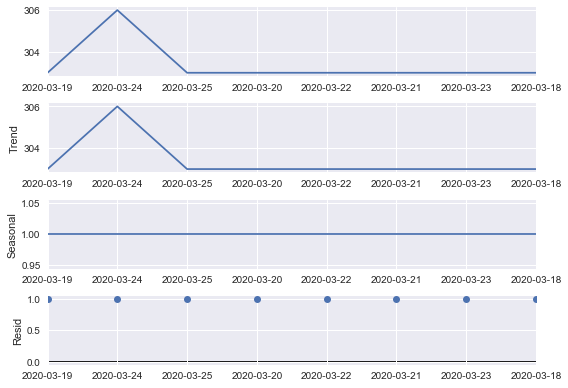

In [9]:
series = df
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

,hosp,rea,rad,dc
jour,,,,
2020-03-18,0,0,0,0
2020-03-19,0,0,0,0
2020-03-20,0,0,0,0
2020-03-21,1,0,0,0
2020-03-22,1,0,0,0
2020-03-23,2,0,0,0
2020-03-24,2,0,0,0
2020-03-25,4,0,0,0
2020-03-26,4,0,0,0


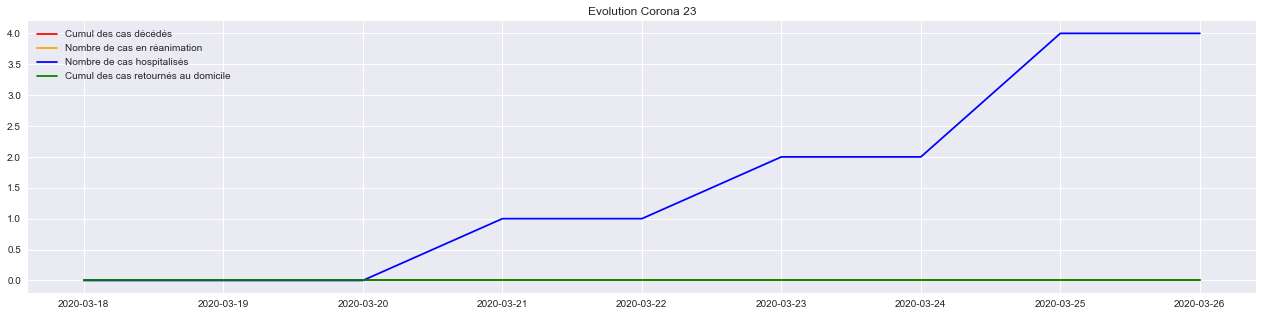

In [13]:
df = pd.read_csv('donnees-hospitalieres-covid19-2020-03-26-18h56.csv',';')
df.index = df.iloc[:]['jour']
df = df.drop(['jour'],axis=1)
df = df[(df['dep']=='23')&(df['sexe']==0)]
df = df.drop(['sexe'],axis=1)
df = df.drop(['dep'],axis=1)
plt.figure(figsize=(22,5))
plt.title(label='Evolution Corona 23')
plt.plot(df.iloc[:]['dc'],label='Cumul des cas décédés',c='red')
plt.plot(df.iloc[:]['rea'],label='Nombre de cas en réanimation',c='orange')
plt.plot(df.iloc[:]['hosp'],label='Nombre de cas hospitalisés',c='b')
plt.plot(df.iloc[:]['rad'],label='Cumul des cas retournés au domicile',c='g')
plt.legend()
df

Regression linéaire eefctuée avec  4.157460291736637 % de précision


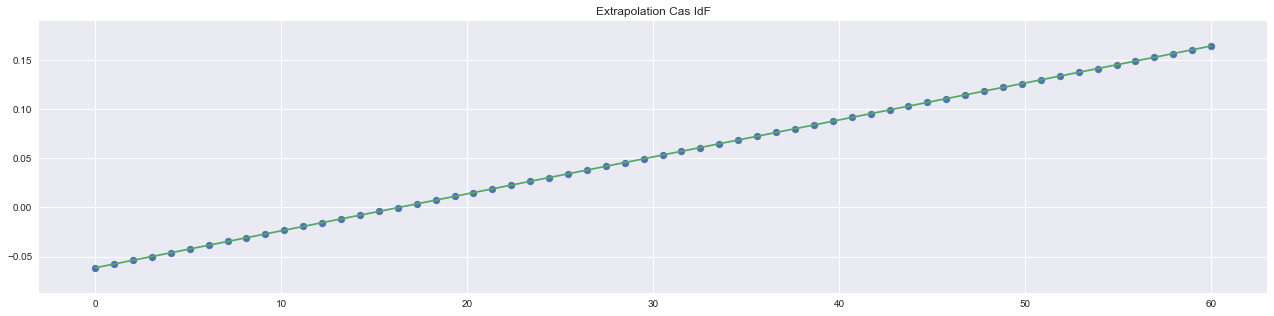

In [29]:
from sklearn.linear_model import LinearRegression
df['Index'] = df.reset_index().index
X = df['Index'].values.reshape(-1, 1)
y = df.iloc[:]['dc'].values.reshape(-1, 1)
reg = LinearRegression().fit(X,y)
score = reg.score(X, y) *100
coef = reg.coef_
cste = reg.intercept_
print('Regression linéaire eefctuée avec ',score,'% de précision')
X_plot = np.linspace(0,60,60)
Y_plot = X_plot*coef + cste
X_plot = X_plot.flatten() 
Y_plot = Y_plot.flatten() 
plt.figure(figsize=(22,5))
plt.scatter(X_plot,Y_plot)
plt.title(label='Extrapolation Cas IdF')
b, m = np.polynomial.polynomial.polyfit(X_plot, Y_plot, 1)

plt.plot(X_plot, Y_plot, '.')
plt.plot(X_plot, b + m * X_plot, '-')
plt.show()